## Tutorial 8

In [7]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.api as sm

path = "../../src/"

## Question 1

In [5]:
data = pd.read_table(path + "data/weeklies.txt", sep=",")
data

,magazine,current,lastyear
0,Business Week,88.36,118.03
1,The Economist,48.00,65.00
2,Newsweek,17.73,42.78
3,The New Republic,9.33,10.47
4,Time,19.46,71.37
5,US News & World Report,11.00,38.09
6,The Weekly Standard,10.00,14.00
7,Auto Week,25.41,22.33
8,Entertainment Weekly,36.00,29.36
9,Golf World,33.67,14.32


In [15]:
difference = data.current - data.lastyear
t_out = stats.ttest_ind(difference, 0)
t_out
ci_90 = t_out.confidence_interval(0.9)
print(t_out.pvalue)
print(ci_90[0], ci_90[1])

0.6834276220636509
-52.04274302367239 31.963795655251317


<Axes: >

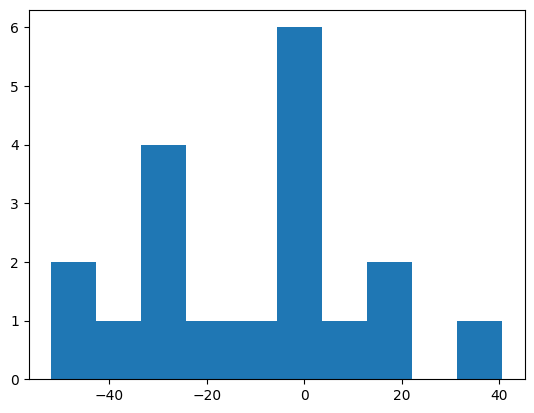

In [17]:
difference.hist(grid=False)

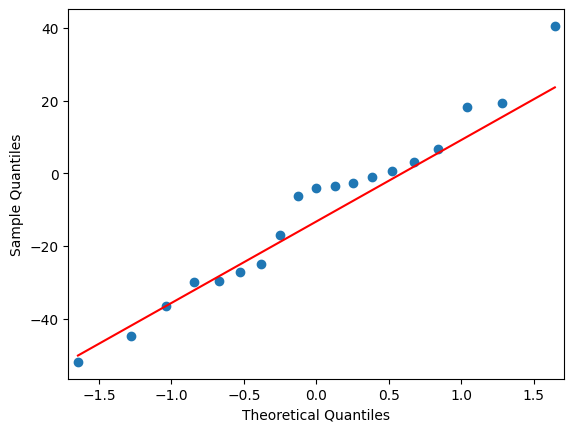

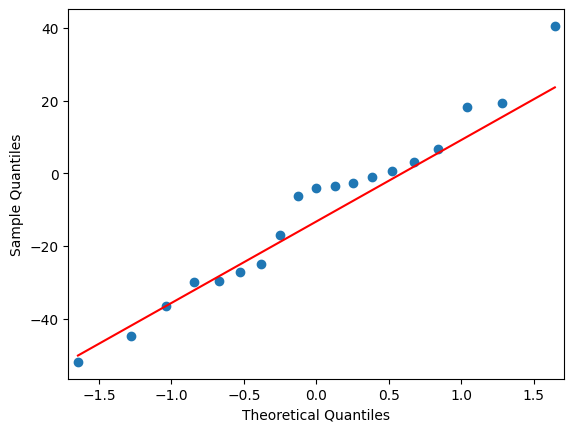

In [18]:
sm.qqplot(difference, line='q')

In [ ]:
norm_out = stats.shapiro(difference)
print(norm_out.pvalue)
# not follow a normal distribution

0.8566515877322433


In [ ]:
difference.skew()
difference.kurt()

np.float64(0.139658222233692)

In [29]:
def h(data):
    Q3 = data.quantile(0.75)
    Q2 = data.quantile(0.5)
    Q1 = data.quantile(0.25)
    return (Q3 + Q1 - 2 * Q2) / (Q3 - Q1)

h(difference)

np.float64(-0.6108358110340271)

## Question 2

In [32]:
machine = pd.read_table(path+"data/machine.txt", sep=" ")
machine

,strength,machine
0,43.6,O
1,78.4,O
2,62.1,O
3,65.1,O
4,69.2,O
...,...,...
95,66.0,N
96,82.7,N
97,62.0,N
98,67.0,N


In [41]:
old = machine[0:50].strength
new = machine[50:100].strength
pair_out = stats.ttest_rel(old, new)
print(pair_out.pvalue)

0.00011733256130548824


## Question 3

In [44]:
flextime = pd.read_table(path+"data/flextime.txt",sep=" ")
flextime

,employee,before,after
0,1,54,68
1,2,25,42
2,3,82,80
3,4,76,91
4,5,63,70
5,6,82,88
6,7,94,90
7,8,72,81
8,9,33,38
9,10,90,93


In [47]:
before = flextime.before
after = flextime.after
wrs_out = stats.mannwhitneyu(before, after)
wrs_out.pvalue

np.float64(0.5450472024811817)

Conclusion: distribution of before is location shift than distribution of after

In [94]:
before_df = pd.DataFrame({'value': before, 'ind': 'before'})
after_df = pd.DataFrame({'value': after, 'ind': 'after'})
pd.concat((before_df, after_df), ignore_index=True)

,value,ind
0,54,before
1,25,before
2,82,before
3,76,before
4,63,before
5,82,before
6,94,before
7,72,before
8,33,before
9,90,before
